In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('input/tweets.csv')
df.head()

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


In [57]:
import re
def clean_tweet(twdf):
    junk = re.compile("al|RT|\n|&.*?;|http[s](?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)*")
    clean_tweets = [junk.sub(" ", t) for t in twdf.tweets]
    return clean_tweets

In [58]:
tweets = clean_tweet(df)
tweets[0]

"ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ABU MUHAMMED AL MAQDISI: http://t.co/73xFszsjvr http://t.co/x8BZcscXzq"

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=.5)
tfidfvec = vec.fit_transform(tweets)

In [60]:
words = vec.get_feature_names()

In [61]:
from matplotlib.colors import LinearSegmentedColormap as lsc
colors=["red","blue","green","black", "yellow"]
cmap=lsc.from_list("mycmap",colors)

In [62]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", height=1000, width=1000, max_words=1000, colormap=cmap).generate(" ".join(words))

(-0.5, 999.5, 999.5, -0.5)

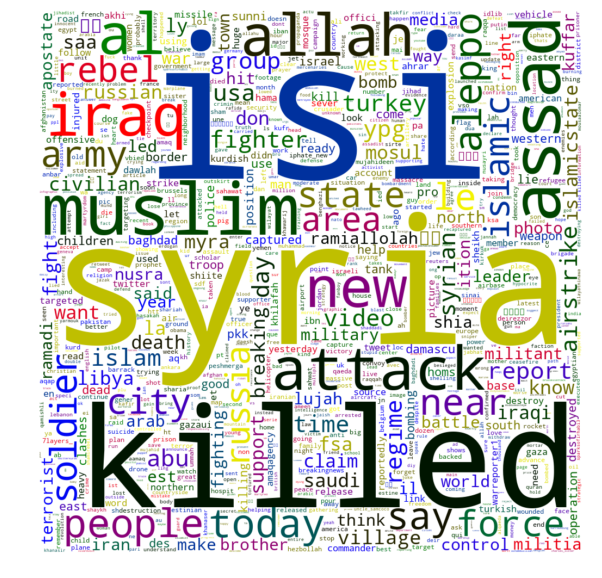

In [63]:
plt.figure(figsize=(10, 10))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")